In [6]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
import functions as fx
from functions import *
import importlib

In [ ]:
# # initialize starting points
# '''
# I'll need a mathematical conversion from tp to sdr
# Maybe not, I can just use the conversion functions
# '''

# # collect optimal solutions in a 360*360*180 grid
# sdrs_opt = zeros((360, 360, 180))

# # set up the grid with spherical bias
# for i in range(0, 360, 10):
#     for j in range(-90, 90, 10):
#         for k in range(-180, 180, 10):
#             sdr_guess = [i, j, k]
#             status, sdr_opt, Ao_opt = mo.minimize_objective(
#                 sdr_guess, Ao, alpha, beta, azimuth, takeoff_angles)

In [ ]:
# invert my_tp2sdr
def sdr2tp(sdr: list) -> tuple:
    """
    Converts from strike, dip, and rake to T and P axes
    ANGLES IN RADIANS!!!

    Args:
        sdr (list): strike, dip, and rake

    Returns:
        tuple: (t, p) as unit vectors in x, y, z
    """
    
    # first normal from strike and dip
    strike, dip, rake = sdr
    print('Printing...')
    print(strike, dip, rake)
    
    n1_theta = bearing2angle(strike + halfpi)
    n1_phi = dip
    n1 = pol2rect(np.array([1, n1_theta, n1_phi]))
    
    
    print(f"n1: {n1}")
    
    
    
    
    
    n2_theta = bearing2angle(strike)
    n2_init = pol2rect(np.array([1, n2_theta, halfpi]))
    n2 = rotate_vector(n2_init, n1, rake)
    
    print(f"n2: {n2}")
    
    # # plot quiver n1 n2
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.quiver(0, 0, 0, n1[0], n1[1], n1[2])
    # ax.quiver(0, 0, 0, n2[0], n2[1], n2[2])
    # ax.set_xlim([-1, 1])
    # ax.set_ylim([-1, 1])
    # ax.set_zlim([-1, 1])
    # plt.show()
    
    # get T and P axes
    t = (n1 + n2)/np.linalg.norm(n1 + n2)
    p = (n1 - n2)/np.linalg.norm(n1 - n2)
    
    # restrict to upper hemisphere
    if t[2] < 0: t *= -1
    if p[2] < 0: p *= -1
    
    # # quick plot quiver t black p red
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.quiver(0, 0, 0, t[0], t[1], t[2], color='black')
    # ax.quiver(0, 0, 0, p[0], p[1], p[2], color='red')
    # ax.set_xlim([-1, 1])
    # ax.set_ylim([-1, 1])
    # ax.set_zlim([-1, 1])
    # plt.show()
    
    print()
    return t, p

In [ ]:
test_sdr = array([0, 0, 0]) # beachball input unit is degrees

for dip in range(0, 90, 20):
    # for strike in range(0, 360, 10):
    #     for rake in range(-180, 180, 10):
            test_sdr = array([0, dip, 0])
            fx.beachball(test_sdr)
# fx.beachball(test_sdr);

# IT'S UPSIDE DOWN!!! wrt strine, north points towards bottom of the screen
# white slides into black for positive rake

In [ ]:
def starting_direc(point: list, normal: list,
                   backup: list = np.array([1,0,0]),
                   restrict: bool = True) -> list:
    """
    Find what vector is perpendicular to point and norm.
    Useful setup for locking every orientation in one hemisphere.
    Restrict to upper hemisphere by default.

    Args:
        point (list): [x,y,z] on a unit sphere
        normal (list): [x,y,z] of the normal vector for embedding plane
        backup (list, optional): backup vector if norm is parallel to point

    Returns:
        list: [x,y,z] of the starting direction
    """
    if 1 - abs(np.dot(point, normal)) < eps: point = backup
    start = np.cross(normal, point)
    start = start/np.linalg.norm(start)
    
    # check if start rotates via point into upper hemisphere
    if restrict and rotate_vector(start, point, np.pi/2)[2] < 0:
        print('Starting direction rotated into lower hemisphere.')
        start *= -1
    
    return start

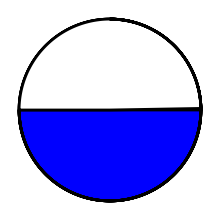

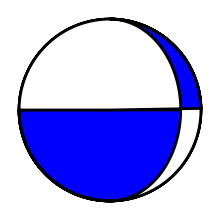

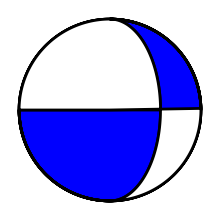

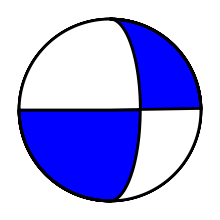

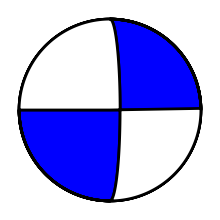

In [3]:
test_sdr = array([0, 0, 0]) # beachball input unit is degrees

for dip in range(0, 90, 20):
    # for strike in range(0, 360, 10):
    #     for rake in range(-180, 180, 10):
            test_sdr = array([0, dip, 0])
            fx.beachball(test_sdr)
# fx.beachball(test_sdr);

# IT'S UPSIDE DOWN!!! wrt strine, north points towards bottom of the screen
# white slides into black for positive rake

#### Testing sdr2tp

Original sdr: [262.97802511  81.58858819 171.49645081]


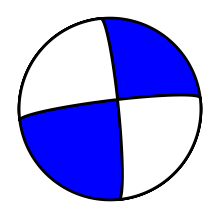

Inverted sdr: [262.97802511  81.58858819 171.49645081] or 
		[354.23093939  81.58858819   8.50354919]


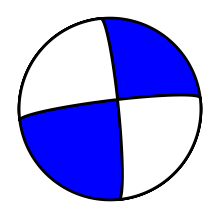

t_orig: [0.61044376 0.76456701 0.20687125]
t:	[0.61044376 0.76456701 0.20687125]
p_orig: [-0.78147166  0.62394073  0.        ]
p:	[-7.81471664e-01  6.23940733e-01  3.72896959e-16]


In [8]:
importlib.reload(fx)
random.seed()

# initial tries
ihat, jhat, khat = array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1])
t_orig, p_orig = ihat, khat

# create random array for t, normalised to 1
t_orig = random.rand(3)
t_orig /= linalg.norm(t_orig)
if t_orig[2] < 0: t_orig *= -1

# create random array for p, normalised to 1
p_orig = fx.starting_direc(t_orig, khat)

# get sdr for test case
# t_orig, p_orig = ihat, khat
sdr, sdr_alt = fx.tp2sdr(t_orig, p_orig, True)
print('Original sdr:', sdr)

# plot corresponding beachball
fx.beachball(sdr);

# now invert, invert back, and compare
t, p = fx.sdr2tp(sdr, True)
sdr2, sdr2_alt = fx.tp2sdr(t, p, True)
print(f'Inverted sdr: {sdr2} or \n\t\t{sdr2_alt}')
fx.beachball(sdr2);

# compare ts and ps
print(f't_orig: {t_orig}\nt:\t{t}')
print(f'p_orig: {p_orig}\np:\t{p}')

In [ ]:
# # plot solutions
# fig7 = plt.figure()
# ax = plt.axes(projection='3d')
# ax.set_box_aspect((1,1,1))
# ax.scatter3D(solutions_alt[:,0], solutions_alt[:,1], solutions_alt[:,2], c='b', s=10)
# ax.set_title("Alt SDR Samples")
# ax.set_xlabel('Strike')
# ax.set_ylabel('Dip')
# ax.set_zlabel('Rake')
# plt.show()

# # 2D scatterplots for sd/sr/dr
# fig8 = plt.figure(figsize=(20,5))
# ax1 = fig8.add_subplot(131)
# plt1 = ax1.scatter(solutions_alt[:,0], solutions_alt[:,1],
#                    c=solutions_alt[:,2], s=10, cmap='rainbow')
# ax1.set_title("Strike vs Dip")
# ax1.set_xlabel('Strike')
# ax1.set_ylabel('Dip')
# cbar1 = fig8.colorbar(plt1)
# ax2 = fig8.add_subplot(132)
# plt2 = ax2.scatter(solutions_alt[:,0], solutions_alt[:,2],
#                      c=solutions_alt[:,1], s=10, cmap='rainbow')
# ax2.set_title("Strike vs Rake")
# ax2.set_xlabel('Strike')
# ax2.set_ylabel('Rake')
# cbar2 = fig8.colorbar(plt2)
# ax3 = fig8.add_subplot(133)
# plt3 = ax3.scatter(solutions_alt[:,1], solutions_alt[:,2],
#                         c=solutions_alt[:,0], s=10, cmap='rainbow')
# ax3.set_title("Dip vs Rake")
# ax3.set_xlabel('Dip')
# ax3.set_ylabel('Rake')
# cbar3 = fig8.colorbar(plt3)
# plt.show()